# Server Temps and Fan speed
Exploring server temps and fan speeds during stress test of Dell PowerEdge R210

In [86]:
import pandas as pd
import seaborn as sns

In [100]:
df = pd.read_csv('server_temp_stress_data/cycle_data0.csv')
max_secs = df['time_seconds'].max()
df2 = pd.read_csv('server_temp_stress_data/cycle_data1.csv')
df2['time_seconds'] = df2['time_seconds'].apply(lambda v: 5 + max_secs + v)
df = pd.concat([df, df2])
df.head()

,time_seconds,temp_c,fan_1_rpm,fan_2_rpm,fan_3_rpm
0,0,28.0,5880,5880,5280
1,5,37.5,5880,5880,5280
2,10,40.5,5880,5880,5280
3,15,43.5,5880,5880,5280
4,20,46.0,5880,5880,5280


Adjust columns to ease fan filtering. Add duty cycle based on RPM values from data sheet [FFB0412UHN-CF00](https://www.delta-fan.com/Download/Spec/FFB0412UHN-CF00.pdf)

In [101]:
MAX_RPM = 18500

In [102]:
def move_rpm_fan_col(df, label, fan_id):
    new_df = df[['time_seconds', 'temp_c', label]].reset_index(drop=True)
    new_df['duty_cycle'] = new_df[label].apply(lambda v: int((v/MAX_RPM) * 100))
    new_df = new_df.drop([label], axis=1)
    new_df['fan'] = fan_id
    return new_df

In [103]:
df = pd.concat([
    move_rpm_fan_col(df, 'fan_1_rpm', 'fan_1'),
    move_rpm_fan_col(df, 'fan_2_rpm', 'fan_2'),
    move_rpm_fan_col(df, 'fan_3_rpm', 'fan_3')
])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time_seconds  711 non-null    int64  
 1   temp_c        711 non-null    float64
 2   duty_cycle    711 non-null    int64  
 3   fan           711 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 27.8+ KB


Duty cycle vs Elapsed time for eached fan

<AxesSubplot: xlabel='time_seconds', ylabel='duty_cycle'>

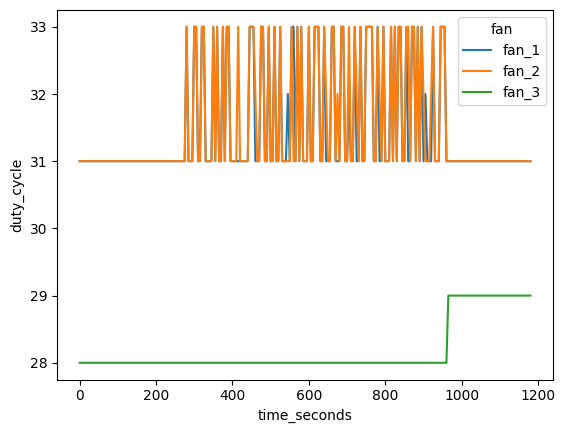

In [104]:
sns.lineplot(x='time_seconds', y='duty_cycle', hue='fan', data=df)

<AxesSubplot: xlabel='time_seconds', ylabel='temp_c'>

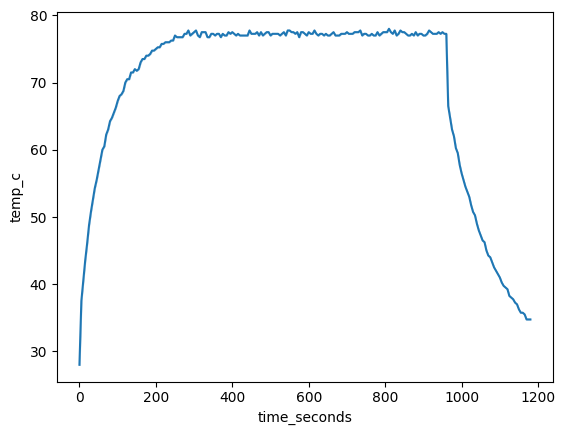

In [105]:
sns.lineplot(x='time_seconds', y='temp_c', data=df)